In [1]:
# https://github.com/aleju/imgaug
!pip install -qU imgaug keras

In [2]:
import imgaug
import skimage.data
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

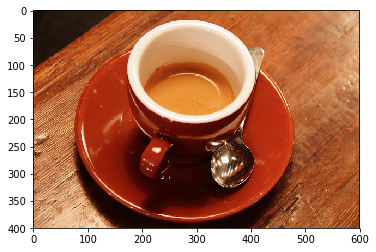

In [3]:
coffee = skimage.data.coffee()
plt.imshow(coffee)

In [4]:
images = np.array([coffee, coffee])
images.shape

(2, 400, 600, 3)

3.0

In [15]:
import imgaug as ia
from imgaug import augmenters as iaa
from scipy import misc
from skimage import io
import random
import numpy as np

# Generate random keypoints.
# The augmenters expect a list of imgaug.KeypointsOnImage.
keypoints_on_images = []
keypoints_on_images_f = []
for image in images:
    height, width = image.shape[0:2]
    keypoints = []
    keypoints_f = []
    for _ in range(4):
        x = random.randint(0, width-1)
        y = random.randint(0, height-1)
        xf = np.float32(x) / width
        yf = np.float32(y) / height
        print(xf, yf)
        keypoints.append(ia.Keypoint(x=x, y=y))
        keypoints_f.append(ia.Keypoint(x=xf, y=yf))
        
    keypoints_on_images.append(ia.KeypointsOnImage(keypoints, shape=image.shape))
    keypoints_on_images_f.append(ia.KeypointsOnImage(keypoints_f, shape=image.shape))

# seq = iaa.Sequential([iaa.GaussianBlur((0, 3.0)), iaa.Affine(scale=(0.5, 0.7))])
seq = iaa.Sequential([
    iaa.Scale({"height": 96, "width": 96}),
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])
seq_det = seq.to_deterministic() # call this for each batch again, NOT only once at the start

# augment keypoints and images
images_aug = seq_det.augment_images(images)
keypoints_aug = seq_det.augment_keypoints(keypoints_on_images)
keypoints_f_aug = seq_det.augment_keypoints(keypoints_on_images_f)

# Example code to show each image and print the new keypoints coordinates
for img_idx, (image_before, image_after, keypoints_before, keypoints_after, keypoints_f_after) in enumerate(zip(images, images_aug, keypoints_on_images, keypoints_aug, keypoints_f_aug)):
    image_before = keypoints_before.draw_on_image(image_before)
    image_after = keypoints_after.draw_on_image(image_after)
#     io.imshow(np.concatenate((image_before, image_after), axis=1)) # before and after
    for kp_idx, keypoint in enumerate(keypoints_after.keypoints):
        keypoint_old = keypoints_on_images[img_idx].keypoints[kp_idx]
        x_old, y_old = keypoint_old.x, keypoint_old.y
        x_new, y_new = keypoint.x, keypoint.y
        print("[Keypoints for image #%d] before aug: x=%d y=%d | after aug: x=%d y=%d" % (img_idx, x_old, y_old, x_new, y_new))
        print(keypoints_f_after.keypoints[kp_idx])
    plt.show()


(0.38333333333333336, 0.15)
(0.27, 0.7175)
(0.175, 0.6925)
(0.7983333333333333, 0.37)
(0.35833333333333334, 0.4975)
(0.19166666666666668, 0.165)
(0.455, 0.0225)
(0.755, 0.3)
[Keypoints for image #0] before aug: x=230 y=60 | after aug: x=60 y=7
Keypoint(x=111.37302857, y=-9.80184615)
[Keypoints for image #0] before aug: x=162 y=287 | after aug: x=75 y=74
Keypoint(x=111.39789714, y=-9.63421538)
[Keypoints for image #0] before aug: x=105 y=277 | after aug: x=88 y=71
Keypoint(x=111.41874286, y=-9.64160000)
[Keypoints for image #0] before aug: x=479 y=148 | after aug: x=6 y=33
Keypoint(x=111.28196571, y=-9.73686154)
[Keypoints for image #1] before aug: x=215 y=199 | after aug: x=67 y=49
Keypoint(x=111.34863158, y=-18.45578507)
[Keypoints for image #1] before aug: x=115 y=66 | after aug: x=88 y=4
Keypoint(x=111.38231579, y=-18.57012537)
[Keypoints for image #1] before aug: x=273 y=9 | after aug: x=56 y=-15
Keypoint(x=111.32909474, y=-18.61912836)
[Keypoints for image #1] before aug: x=453 y=

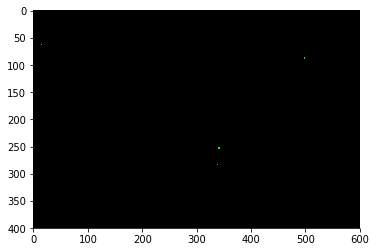

In [6]:
plt.imshow(keypoints_before.draw_on_image(np.zeros((400, 600, 3))))

/usr/local/lib/python2.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


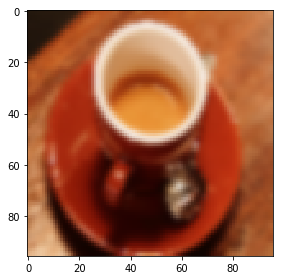

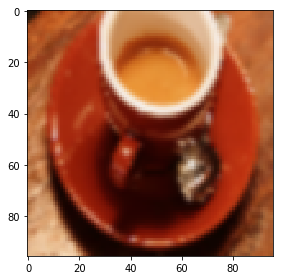

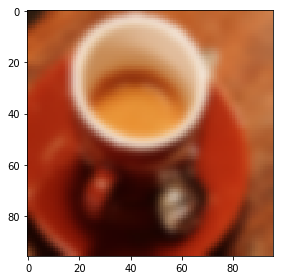

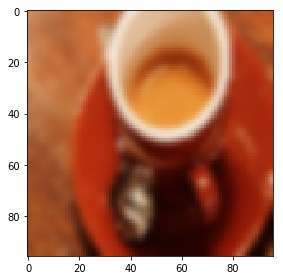

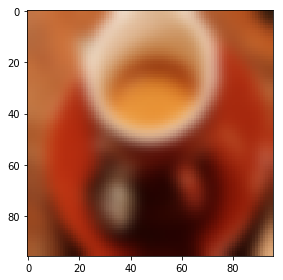

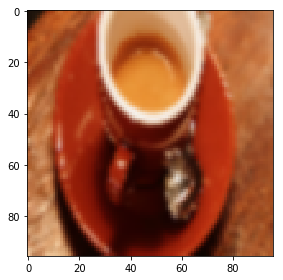

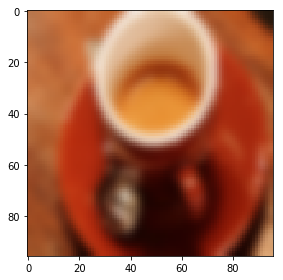

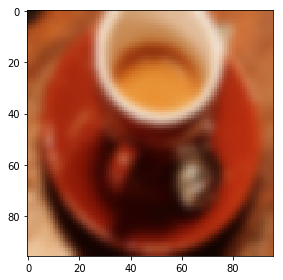

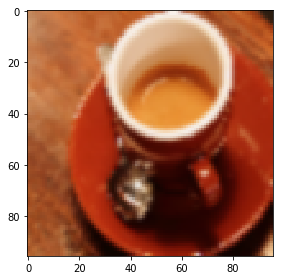

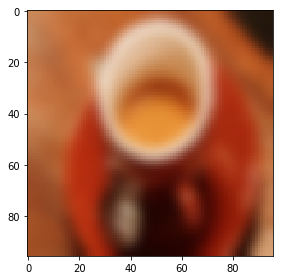

In [7]:
seq = iaa.Sequential([
    iaa.Scale({"height": 96, "width": 96}),
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])
seq_det = seq.to_deterministic() # call this for each batch again, NOT only once at the start

for i in range(10):
    seq_det = seq.to_deterministic()
    images_aug = seq_det.augment_images(images)
    io.imshow(images_aug[0])
    plt.show()

In [8]:
# minst generator sample

import numpy as np
from random import randint
np.random.seed(123)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

def generator(features, labels, batch_size):

    # create empty arrays to contain batch of features and labels
    batch_features = np.zeros((batch_size, 28, 28, 1))
    batch_labels = np.zeros((batch_size, 10))

    seq = iaa.Sequential([
        iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
        iaa.Fliplr(0.5), # horizontally flip 50% of the images
        iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
    ])
    seq_det = seq.to_deterministic()

    while True:
        for i in range(batch_size):
            # choose random index in features
            index = np.random.randint(0, len(features)-1)
            random_augmented_image, random_augmented_label = features[index], labels[index]
            batch_features[i] = seq_det.augment_image(random_augmented_image)
            batch_labels[i] = random_augmented_label

        yield batch_features, batch_labels

# load pre-shuffled MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# pre-process data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train.shape)

# build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)
model.fit_generator(generator(X_train, Y_train, 32), steps_per_epoch=X_train.shape[0] / 32, epochs=10, verbose=1)


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(60000, 10)
Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 2.3018 - acc: 0.1096
Epoch 2/10
1875/1875 [==============================] - 46s 24ms/step - loss: 2.3012 - acc: 0.1141
Epoch 3/10
1875/1875 [==============================] - 46s 24ms/step - loss: 2.3010 - acc: 0.1130
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 2.3010 - acc: 0.1141
Epoch 5/10
1875/1875 [==============================] - 40s 22ms/step - loss: 2.3014 - acc: 0.1115
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 2.3014 - acc: 0.1104
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 2.3015 - acc: 0.1115
Epoch 8/10
1875/1875 [==============================] - 40s 21ms/step - loss: 2.3013 - acc: 0.1133
Epoch 9/10
1875/1875 [==============================] - 43s 23ms/step - loss: 2.3009 - acc: 0.1132
Epoch 10/10
1875/1875 [==============================] - 40s 21ms/step - loss: 2.3011 - acc: 0.11

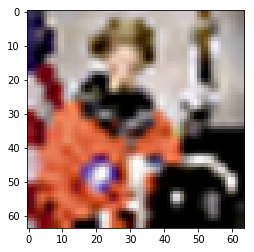

In [9]:
seq = iaa.Sequential([
    iaa.Scale({"height": 64, "width": 64}),
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])
seq_det = seq.to_deterministic()

astronaut = skimage.data.astronaut()
plt.imshow(seq_det.augment_image(ia.imresize_single_image(astronaut, (24, 24))))

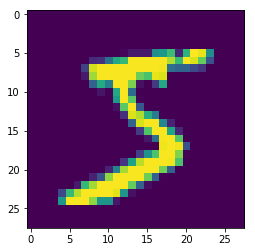

In [10]:
plt.imshow(X_train[0].reshape((28, 28)))

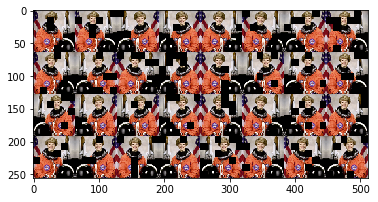

In [11]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
from skimage import data

# Number of batches and batch size for this example
nb_batches = 10
batch_size = 32

# Example augmentation sequence to run in the background
augseq = iaa.Sequential([
    iaa.Scale({"height": 64, "width": 64}),
    iaa.Fliplr(0.5),
    iaa.CoarseDropout(p=0.1, size_percent=0.1)
])

# For simplicity, we use the same image here many times
astronaut = data.astronaut()
astronaut = ia.imresize_single_image(astronaut, (96, 96))

# Make batches out of the example image (here: 10 batches, each 32 times
# the example image)
batches = []
for _ in range(nb_batches):
    batches.append(
        np.array(
            [astronaut for _ in range(batch_size)],
            dtype=np.uint8
        )
    )

# Show the augmented images.
# Note that augment_batches() returns a generator.
for images_aug in augseq.augment_batches(batches, background=True):
    plt.imshow(ia.draw_grid(images_aug, cols=8))